In [2]:
import pandas as pd
import numpy as np
import os
import glob
import csv
import re
import string
import nltk
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,13))
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
from plotly.subplots import make_subplots
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
os.getcwd()

'/Users/clinton/Desktop/HU/CISC_525/Project/CISC-525-Final-Project'

In [4]:
path = '/Users/clinton/Desktop/HU/CISC_525/Project/CISC-525-Final-Project/covid_19_clean.csv'
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [6]:
# defining an empty list to store 
# content
data_frame = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in csv_files:
    
    # reading content of csv file
    # content.append(filename)
    df = pd.read_csv(filename,error_bad_lines=False,quoting=csv.QUOTE_NONE)
    content.append(df)
# converting content to data frame
data_frame = pd.concat(content)
data_frame.head(6)


b'Skipping line 3: expected 13 fields, saw 16\nSkipping line 4: expected 13 fields, saw 14\nSkipping line 6: expected 13 fields, saw 14\nSkipping line 7: expected 13 fields, saw 16\nSkipping line 8: expected 13 fields, saw 15\nSkipping line 10: expected 13 fields, saw 14\nSkipping line 11: expected 13 fields, saw 17\nSkipping line 17: expected 13 fields, saw 19\nSkipping line 19: expected 13 fields, saw 14\nSkipping line 21: expected 13 fields, saw 16\nSkipping line 23: expected 13 fields, saw 14\nSkipping line 24: expected 13 fields, saw 19\nSkipping line 25: expected 13 fields, saw 16\nSkipping line 27: expected 13 fields, saw 16\nSkipping line 29: expected 13 fields, saw 15\nSkipping line 30: expected 13 fields, saw 14\nSkipping line 31: expected 13 fields, saw 15\nSkipping line 32: expected 13 fields, saw 14\nSkipping line 33: expected 13 fields, saw 14\nSkipping line 36: expected 13 fields, saw 14\nSkipping line 37: expected 13 fields, saw 22\nSkipping line 38: expected 13 fields,

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,if i smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,the one gift has give me is an appreciation f...,['COVID19'],Twitter for iPhone,False
2,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,you now have to wear face coverings when out s...,NaN,TweetDeck,False
3,Voice Of CBSE Students,NaN,NaN,2020-07-14 17:50:30,8,10,7,False,2020-07-25 12:26:53,k covid cases still no response from,NaN,NaN,NaN
4,"""Always Make Happiness Your #1 Priority\""""",2010-03-25 21:16:20,0,8,32,False,2020-07-25 12:26:47,👋🏻@PattyHajdu @NavdeepSBains — no one will be ...,['COVID19'],twitter web app,False,NaN,NaN
5,Africa Youth Advisory Board on DRR,Africa,Official account of the Africa Youth Advisory ...,2019-05-13 06:27:47,830,254,3692,False,2020-07-25 12:26:47,lets all protect ourselves from,NaN,NaN,NaN


In [18]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106913 entries, 0 to 3486
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_name           104506 non-null  object 
 1   user_location       100966 non-null  object 
 2   user_description    104554 non-null  object 
 3   user_created        106450 non-null  object 
 4   user_followers      102928 non-null  object 
 5   user_friends        97113 non-null   object 
 6   user_favourites     93664 non-null   object 
 7   user_verified       86274 non-null   object 
 8   date                68886 non-null   object 
 9   text                57938 non-null   object 
 10  hashtags            39065 non-null   object 
 11  source              28778 non-null   object 
 12  is_retweet          16261 non-null   object 
 13  text2               106913 non-null  object 
 14  clean_text          57938 non-null   object 
 15  sentiments          106913 non-null  obje

In [23]:
data_frame["text"] = data_frame["text"].astype(str)

In [27]:
# Stopword Removal
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data_frame["text"] = data_frame["text"].apply(lambda text: remove_stopwords(text))
data_frame["text"]

0       smelled scent hand sanitizers today someone pa...
1       one gift give appreciation simple things alway...
2       wear face coverings shopping includes visit lo...
3                            k covid cases still response
4                                         twitter web app
                              ...                        
3482    quick note lovely members social distance dont...
3483                                      twitter web app
3484    trump administrations incompetence led highest...
3485                           report outbreaks k schools
3486                                      twitter web app
Name: text, Length: 106913, dtype: object

In [28]:
# Most common words
from collections import Counter
cnt = Counter()
for text in data_frame["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('nan', 48975),
 ('Twitter', 10109),
 ('False', 9047),
 ('App', 3913),
 ('Web', 3862),
 ('iPhone', 3229),
 ("['COVID19']", 2865),
 ('Android', 2560),
 ('twitter', 2035),
 ('cases', 1768)]

In [29]:
# Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid = SIA()
data_frame['sentiments'] = data_frame["text"].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',str(x).lower()))))
#print(sentiments)
data_frame['Positive Sentiment'] = data_frame['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
data_frame['Neutral Sentiment'] = data_frame['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
data_frame['Negative Sentiment'] = data_frame['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
data_frame.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,source,is_retweet,text2,clean_text,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number_Of_Words,Mean_Word_Length
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,smelled scent hand sanitizers today someone pa...,...,Twitter for iPhone,False,<bound method Series.to_string of 0 if i...,if i smelled the scent of hand sanitizers toda...,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",0.262001,0.738001,0.000001,22,4.23
1,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,one gift give appreciation simple things alway...,...,Twitter for iPhone,False,<bound method Series.to_string of 0 if i...,the one gift has give me is an appreciation f...,"{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp...",0.508001,0.492001,0.000001,19,3.95
2,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,wear face coverings shopping includes visit lo...,...,TweetDeck,False,<bound method Series.to_string of 0 if i...,you now have to wear face coverings when out s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,20,4.50
3,Voice Of CBSE Students,NaN,NaN,2020-07-14 17:50:30,8,10,7,False,2020-07-25 12:26:53,k covid cases still response,...,NaN,NaN,<bound method Series.to_string of 0 if i...,k covid cases still no response from,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,7,4.29
4,"""Always Make Happiness Your #1 Priority\""""",2010-03-25 21:16:20,0,8,32,False,2020-07-25 12:26:47,👋🏻@PattyHajdu @NavdeepSBains — no one will be ...,['COVID19'],twitter web app,...,NaN,NaN,<bound method Series.to_string of 0 if i...,twitter web app,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,3,4.33


0.02097495078241186
0.02901436600787556
0.9396222434409284


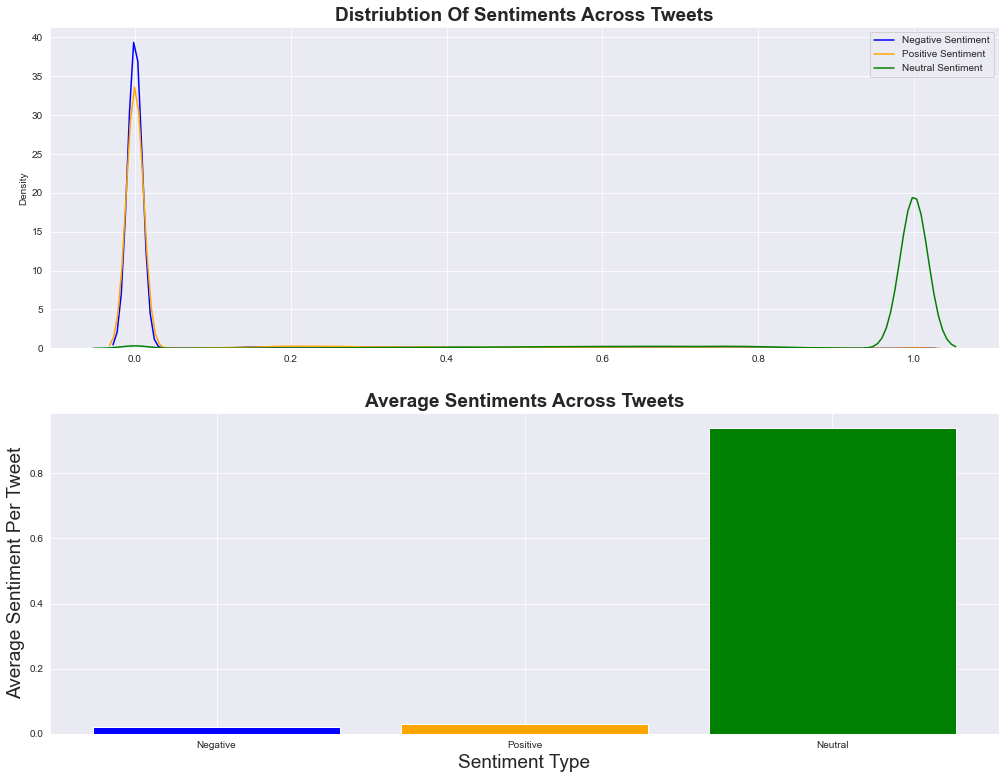

In [30]:
# Sentiment Distribution
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data_frame['Negative Sentiment'], color = 'blue')
sns.kdeplot(data_frame['Positive Sentiment'], color = 'orange')
sns.kdeplot(data_frame['Neutral Sentiment'], color = 'green')
plt.xlabel(' ')
plt.legend(['Negative Sentiment','Positive Sentiment','Neutral Sentiment'])
plt.subplot(2,1,2)
plt.title('Average Sentiments Across Tweets',fontsize=19,fontweight='bold')
neg_total_avg = (data_frame['Negative Sentiment'].sum())/len(data_frame.index)
print(neg_total_avg)
pos_total_avg = (data_frame['Positive Sentiment'].sum())/len(data_frame.index)
print(pos_total_avg)
neu_total_avg = (data_frame['Neutral Sentiment'].sum())/len(data_frame.index)
print(neu_total_avg)
sentiment_type = ['Negative','Positive','Neutral']
sentiment_total_avg = [neg_total_avg, pos_total_avg, neu_total_avg]
data_frame.head()
plt.bar(sentiment_type, sentiment_total_avg, color = ['blue', 'orange', 'green'])
plt.ylabel('Average Sentiment Per Tweet',fontsize=19)
plt.xlabel('Sentiment Type',fontsize=19)
plt.show()

In [31]:
#Number of Words
data_frame['Number_Of_Words'] = data_frame['text'].apply(lambda x:len(x.split(' ')))
#Average Word Length
data_frame['Mean_Word_Length'] = data_frame['text'].apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
data_frame.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,source,is_retweet,text2,clean_text,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number_Of_Words,Mean_Word_Length
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,smelled scent hand sanitizers today someone pa...,...,Twitter for iPhone,False,<bound method Series.to_string of 0 if i...,if i smelled the scent of hand sanitizers toda...,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",0.262001,0.738001,0.000001,10,6.30
1,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,one gift give appreciation simple things alway...,...,Twitter for iPhone,False,<bound method Series.to_string of 0 if i...,the one gift has give me is an appreciation f...,"{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp...",0.508001,0.492001,0.000001,8,5.88
2,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,wear face coverings shopping includes visit lo...,...,TweetDeck,False,<bound method Series.to_string of 0 if i...,you now have to wear face coverings when out s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,9,6.67
3,Voice Of CBSE Students,NaN,NaN,2020-07-14 17:50:30,8,10,7,False,2020-07-25 12:26:53,k covid cases still response,...,NaN,NaN,<bound method Series.to_string of 0 if i...,k covid cases still no response from,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,5,4.80
4,"""Always Make Happiness Your #1 Priority\""""",2010-03-25 21:16:20,0,8,32,False,2020-07-25 12:26:47,👋🏻@PattyHajdu @NavdeepSBains — no one will be ...,['COVID19'],twitter web app,...,NaN,NaN,<bound method Series.to_string of 0 if i...,twitter web app,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,3,4.33


In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

data_frame["Positive Sentiment"] = [SIA.polarity_scores(i)["pos"] for i in data_frame["text"]]
data_frame["Neutral Sentiment"] = [SIA.polarity_scores(j)["neu"] for j in data_frame["text"]]
data_frame["Negative Sentiment"] = [SIA.polarity_scores(k)["neg"] for k in data_frame["text"]]

df1 = data_frame[["text", "Positive Sentiment","Neutral Sentiment", "Negative Sentiment"]]
df1.head()

,text,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,smelled scent hand sanitizers today someone pa...,0.262,0.738,0.0
1,one gift give appreciation simple things alway...,0.508,0.492,0.0
2,wear face coverings shopping includes visit lo...,0.000,1.000,0.0
3,k covid cases still response,0.000,1.000,0.0
4,twitter web app,0.000,1.000,0.0
